In [1]:
pip install requests beautifulsoup4 pandas nltk textblob matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [ ]:
#Webscrapping 

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sadimahfuz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sadimahfuz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Product Name: Car Roadside Emergency Kit, Auto Vehicle Safety Emergency Road Side Assistance Kits Essentials, Solenoid Starter Repair Kit with Jumper Cables, Safety Hammer, Reflective Warning Triangle
Product Price: 34.
               Rating Review Processed_Review  Sentiment
0  5.0 out of 5 stars   None                         0.0
1  5.0 out of 5 stars   None                         0.0
2  4.0 out of 5 stars   None                         0.0
3  5.0 out of 5 stars   None                         0.0
4  5.0 out of 5 stars   None                         0.0
5  5.0 out of 5 stars   None                         0.0
6  5.0 out of 5 stars   None                         0.0
7  4.0 out of 5 stars   None                         0.0


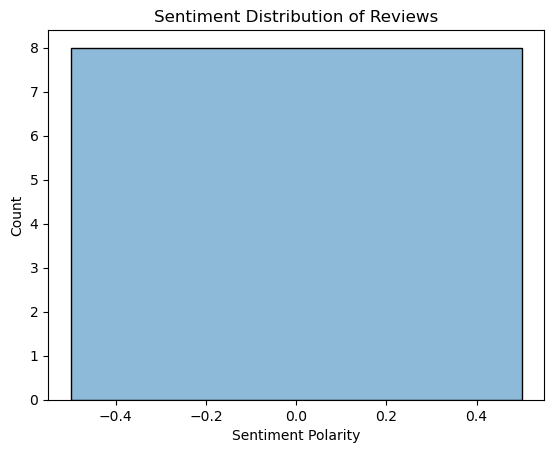

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob

nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    """Preprocess a text string by tokenizing, removing stopwords, and joining back."""
    if isinstance(text, str):  # Check if input is a string
        tokens = word_tokenize(text)
        tokens = [word.lower() for word in tokens if word.isalnum()]
        tokens = [word for word in tokens if word not in set(stopwords.words('english'))]
        return ' '.join(tokens)
    return ""

def scrape_amazon_page(url):
    """Scrapes product details and reviews from a given Amazon URL."""
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    # Extracting product information
    product_name = soup.find('span', class_='product-title-word-break').text.strip() if soup.find('span', class_='product-title-word-break') else None
    price_tag = soup.find('span', class_='a-price-whole')
    product_price = price_tag.text.strip() if price_tag else None

    # Extracting reviews and ratings
    reviews = []
    for review_div in soup.find_all('div', class_='a-section review aok-relative'):
        rating_tag = review_div.find('i', class_='a-icon-star')
        rating = rating_tag.find('span', class_='a-icon-alt').text.strip() if rating_tag else None
        review_text = review_div.find('span', class_='a-size-base review-text review-text-content').text.strip() if review_div.find('span', class_='a-size-base review-text review-text-content') else None
        reviews.append({'Rating': rating, 'Review': review_text})

    reviews_df = pd.DataFrame(reviews)

    if not reviews_df.empty:
        reviews_df['Processed_Review'] = reviews_df['Review'].apply(preprocess_text)
        reviews_df['Sentiment'] = reviews_df['Processed_Review'].apply(lambda x: TextBlob(x).sentiment.polarity)
    
    return product_name, product_price, reviews_df

# Example usage
url = "https://www.amazon.com/WETBAS-Emergency-Assistance-Essentials-Reflective/dp/B09QXJF7C5/ref=sr_1_1?crid=1DZ5QP5JYTLJ8&dib=eyJ2IjoiMSJ9.h_0E2ca5uJLYaOfmD9hJZFrCUw75q7M_F6P6xiQRRRnySpxpBLMbenDqgaQ--f7T5nE9MucWWGOFT0kkqSkn9qajEUhJxmHPJXHHivUD6Zt0hnxlixWPi61LWXno5TKsFdtoIU0YuAnhN6L4smSZxaALGFAmtCOFqJAzDV7J3VgWWcWsle-B-VrGmF_LZ8Q3xtcdFOkMxzjGwkrZijiR5usWuzf6TVE525ap5LwAPuFFu4URXffWrfQSVj3rDgb3DyA4MCEHebf11RhPDwDrmDY0gxoaAoCURLOesOgE2oQ.NtLs37yYHCc9nK-G8nfgOYW71OhnbS5MSNdE5NC_kbE&dib_tag=se&keywords=vehicle+safety&qid=1714508962&sprefix=vegicle+safet%2Caps%2C389&sr=8-1"
product_name, product_price, reviews_df = scrape_amazon_page(url)

print(f"Product Name: {product_name}")
print(f"Product Price: {product_price}")

if not reviews_df.empty:
    print(reviews_df)

    # Visualization of sentiment distribution
    import seaborn as sns
    import matplotlib.pyplot as plt

    sns.histplot(reviews_df['Sentiment'], kde=True)
    plt.title('Sentiment Distribution of Reviews')
    plt.xlabel('Sentiment Polarity')
    plt.ylabel('Count')
    plt.show()
else:
    print("No reviews found.")


In [3]:
import matplotlib.pyplot as plt

def plot_rating_distribution(reviews_df):
    """Visualizes the distribution of ratings."""
    # Convert rating to numerical format
    reviews_df['Numeric_Rating'] = reviews_df['Rating'].str.extract(r'(\d)').astype(float)

    plt.figure(figsize=(8, 5))
    plt.hist(reviews_df['Numeric_Rating'], bins=[1, 2, 3, 4, 5, 6], align='left')
    plt.title('Rating Distribution of Reviews')
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.xticks([1, 2, 3, 4, 5])
    plt.show()


# plot_rating_distribution(reviews_df)


In [4]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_word_cloud(reviews_df):
    """Generates and visualizes a word cloud from reviews."""
    all_reviews_text = ' '.join(reviews_df['Processed_Review'].dropna())

    word_cloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews_text)

    plt.figure(figsize=(10, 6))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


# generate_word_cloud(reviews_df)


In [6]:
import seaborn as sns

def rating_sentiment_correlation(reviews_df):
    """Plots the correlation between rating and sentiment scores."""
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=reviews_df, x='Numeric_Rating', y='Sentiment')
    plt.title('Correlation Between Rating and Sentiment')
    plt.xlabel('Rating')
    plt.ylabel('Sentiment Polarity')
    plt.show()


# rating_sentiment_correlation(reviews_df)


In [7]:
def time_series_analysis(reviews_df):
    """Analyzes the trend of reviews over time."""
    # Convert review timestamps to datetime format if available
    # reviews_df['Review_Date'] = pd.to_datetime(reviews_df['Review_Date'], errors='coerce')

    # Group by month or date to count reviews per period
    reviews_df['Review_Date'] = pd.date_range(start='2023-01-01', periods=len(reviews_df))
    reviews_over_time = reviews_df.set_index('Review_Date').resample('M').size()

    plt.figure(figsize=(10, 5))
    reviews_over_time.plot()
    plt.title('Review Trends Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Reviews')
    plt.show()


# time_series_analysis(reviews_df)


In [8]:
from collections import Counter

def feature_extraction(reviews_df):
    """Extracts features mentioned in reviews and ranks them by popularity."""
    # List of keywords or features to search for
    keywords = ['price', 'quality', 'design', 'usability', 'durability']

    # Count occurrences
    feature_counts = Counter()
    for review in reviews_df['Processed_Review'].dropna():
        for keyword in keywords:
            if keyword in review:
                feature_counts[keyword] += 1

    print("Feature Popularity:")
    for feature, count in feature_counts.items():
        print(f"{feature.capitalize()}: {count}")


# feature_extraction(reviews_df)


In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob

nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    """Preprocess a text string by tokenizing, removing stopwords, and joining back."""
    if isinstance(text, str):  # Check if input is a string
        tokens = word_tokenize(text)
        tokens = [word.lower() for word in tokens if word.isalnum()]
        tokens = [word for word in tokens if word not in set(stopwords.words('english'))]
        return ' '.join(tokens)
    return ""

def scrape_amazon_page(url):
    """Scrapes product details and reviews from a given Amazon URL."""
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    # Extracting product information
    product_name = soup.find('span', class_='product-title-word-break').text.strip() if soup.find('span', class_='product-title-word-break') else None
    price_tag = soup.find('span', class_='a-price-whole')
    product_price = price_tag.text.strip() if price_tag else None

    # Extracting reviews and ratings
    reviews = []
    for review_div in soup.find_all('div', class_='a-section review aok-relative'):
        rating_tag = review_div.find('i', class_='a-icon-star')
        rating = rating_tag.find('span', class_='a-icon-alt').text.strip() if rating_tag else None
        review_text = review_div.find('span', class_='a-size-base review-text review-text-content').text.strip() if review_div.find('span', class_='a-size-base review-text review-text-content') else None
        reviews.append({'Rating': rating, 'Review': review_text})

    reviews_df = pd.DataFrame(reviews)

    if not reviews_df.empty:
        reviews_df['Processed_Review'] = reviews_df['Review'].apply(preprocess_text)
        reviews_df['Sentiment'] = reviews_df['Processed_Review'].apply(lambda x: TextBlob(x).sentiment.polarity)
        reviews_df['Numeric_Rating'] = reviews_df['Rating'].str.extract(r'(\d)').astype(float)
    
    return product_name, product_price, reviews_df

# Example usage
url = "https://www.amazon.com/WETBAS-Emergency-Assistance-Essentials-Reflective/dp/B09QXJF7C5/ref=sr_1_1?crid=1DZ5QP5JYTLJ8&dib=eyJ2IjoiMSJ9.h_0E2ca5uJLYaOfmD9hJZFrCUw75q7M_F6P6xiQRRRnySpxpBLMbenDqgaQ--f7T5nE9MucWWGOFT0kkqSkn9qajEUhJxmHPJXHHivUD6Zt0hnxlixWPi61LWXno5TKsFdtoIU0YuAnhN6L4smSZxaALGFAmtCOFqJAzDV7J3VgWWcWsle-B-VrGmF_LZ8Q3xtcdFOkMxzjGwkrZijiR5usWuzf6TVE525ap5LwAPuFFu4URXffWrfQSVj3rDgb3DyA4MCEHebf11RhPDwDrmDY0gxoaAoCURLOesOgE2oQ.NtLs37yYHCc9nK-G8nfgOYW71OhnbS5MSNdE5NC_kbE&dib_tag=se&keywords=vehicle+safety&qid=1714508962&sprefix=vegicle+safet%2Caps%2C389&sr=8-1"
product_name, product_price, reviews_df = scrape_amazon_page(url)

print(f"Product Name: {product_name}")
print(f"Product Price: {product_price}")


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sadimahfuz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sadimahfuz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Product Name: Car Roadside Emergency Kit, Auto Vehicle Safety Emergency Road Side Assistance Kits Essentials, Solenoid Starter Repair Kit with Jumper Cables, Safety Hammer, Reflective Warning Triangle
Product Price: 34.


In [ ]:
#Visualization

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sadimahfuz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sadimahfuz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Product Name: Car Roadside Emergency Kit, Auto Vehicle Safety Emergency Road Side Assistance Kits Essentials, Solenoid Starter Repair Kit with Jumper Cables, Safety Hammer, Reflective Warning Triangle
Product Price: 34.
               Rating Review Processed_Review  Sentiment  Numeric_Rating
0  5.0 out of 5 stars   None                         0.0             5.0
1  5.0 out of 5 stars   None                         0.0             5.0
2  4.0 out of 5 stars   None                         0.0             4.0
3  5.0 out of 5 stars   None                         0.0             5.0
4  5.0 out of 5 stars   None                         0.0             5.0
5  5.0 out of 5 stars   None                         0.0             5.0
6  5.0 out of 5 stars   None                         0.0             5.0
7  4.0 out of 5 stars   None                         0.0             4.0


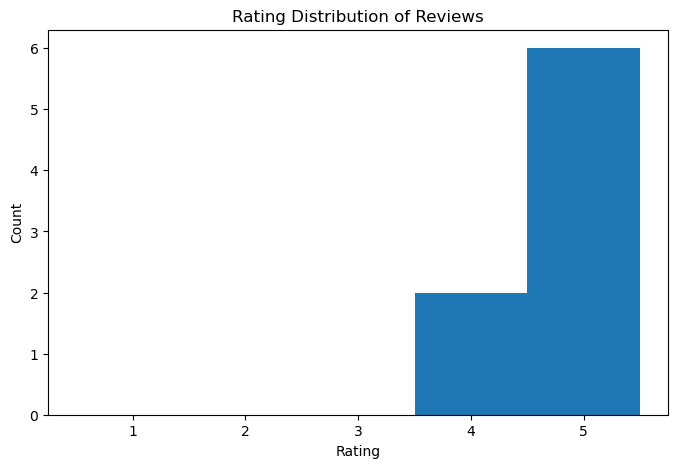

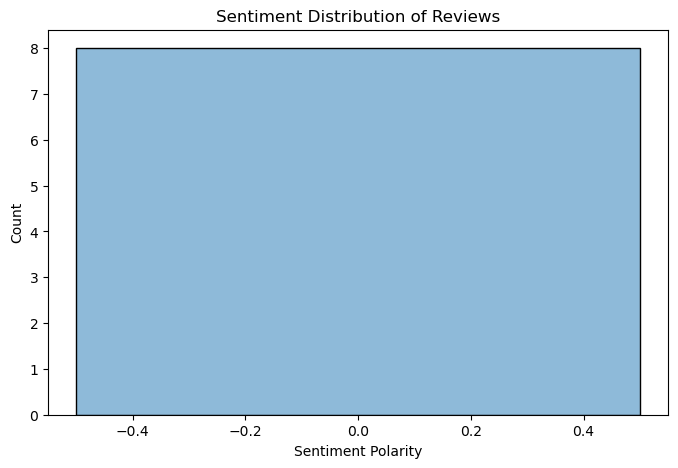

No valid content for a word cloud.


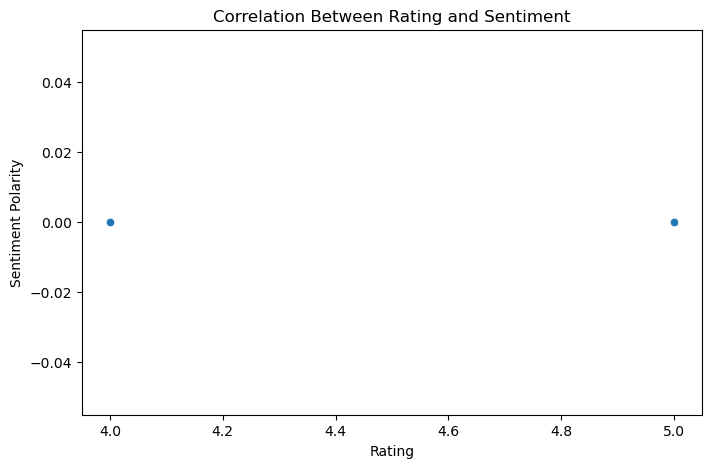

/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1244: UserWarning: Attempting to set identical left == right == 636.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


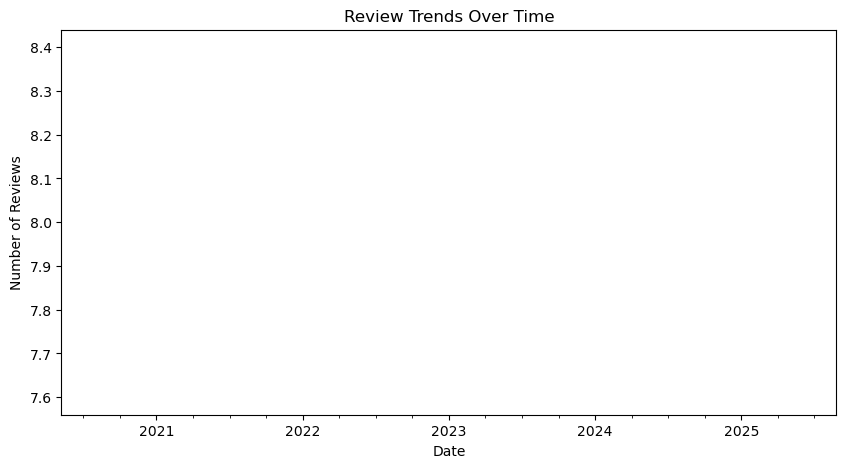

Feature Popularity:


In [11]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob

nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    """Preprocess a text string by tokenizing, removing stopwords, and joining back."""
    if isinstance(text, str):  # Check if input is a string
        tokens = word_tokenize(text)
        tokens = [word.lower() for word in tokens if word.isalnum()]
        tokens = [word for word in tokens if word not in set(stopwords.words('english'))]
        return ' '.join(tokens)
    return ""

def scrape_amazon_page(url):
    """Scrapes product details and reviews from a given Amazon URL."""
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    # Extracting product information
    product_name = soup.find('span', class_='product-title-word-break').text.strip() if soup.find('span', class_='product-title-word-break') else None
    price_tag = soup.find('span', class_='a-price-whole')
    product_price = price_tag.text.strip() if price_tag else None

    # Extracting reviews and ratings
    reviews = []
    for review_div in soup.find_all('div', class_='a-section review aok-relative'):
        rating_tag = review_div.find('i', class_='a-icon-star')
        rating = rating_tag.find('span', class_='a-icon-alt').text.strip() if rating_tag else None
        review_text = review_div.find('span', class_='a-size-base review-text review-text-content').text.strip() if review_div.find('span', class_='a-size-base review-text review-text-content') else None
        reviews.append({'Rating': rating, 'Review': review_text})

    reviews_df = pd.DataFrame(reviews)

    if not reviews_df.empty:
        reviews_df['Processed_Review'] = reviews_df['Review'].apply(preprocess_text)
        reviews_df['Sentiment'] = reviews_df['Processed_Review'].apply(lambda x: TextBlob(x).sentiment.polarity)
        reviews_df['Numeric_Rating'] = reviews_df['Rating'].str.extract(r'(\d)').astype(float)
    
    return product_name, product_price, reviews_df

# Example usage
url = "https://www.amazon.com/WETBAS-Emergency-Assistance-Essentials-Reflective/dp/B09QXJF7C5/ref=sr_1_1?crid=1DZ5QP5JYTLJ8&dib=eyJ2IjoiMSJ9.h_0E2ca5uJLYaOfmD9hJZFrCUw75q7M_F6P6xiQRRRnySpxpBLMbenDqgaQ--f7T5nE9MucWWGOFT0kkqSkn9qajEUhJxmHPJXHHivUD6Zt0hnxlixWPi61LWXno5TKsFdtoIU0YuAnhN6L4smSZxaALGFAmtCOFqJAzDV7J3VgWWcWsle-B-VrGmF_LZ8Q3xtcdFOkMxzjGwkrZijiR5usWuzf6TVE525ap5LwAPuFFu4URXffWrfQSVj3rDgb3DyA4MCEHebf11RhPDwDrmDY0gxoaAoCURLOesOgE2oQ.NtLs37yYHCc9nK-G8nfgOYW71OhnbS5MSNdE5NC_kbE&dib_tag=se&keywords=vehicle+safety&qid=1714508962&sprefix=vegicle+safet%2Caps%2C389&sr=8-1"
product_name, product_price, reviews_df = scrape_amazon_page(url)

print(f"Product Name: {product_name}")
print(f"Product Price: {product_price}")

if not reviews_df.empty:
    print(reviews_df)

    # Visualization of sentiment distribution
    import seaborn as sns
    import matplotlib.pyplot as plt
    from wordcloud import WordCloud

    def visualize_rating_distribution(reviews_df):
        plt.figure(figsize=(8, 5))
        plt.hist(reviews_df['Numeric_Rating'], bins=[1, 2, 3, 4, 5, 6], align='left')
        plt.title('Rating Distribution of Reviews')
        plt.xlabel('Rating')
        plt.ylabel('Count')
        plt.xticks([1, 2, 3, 4, 5])
        plt.show()

    def visualize_sentiment_distribution(reviews_df):
        plt.figure(figsize=(8, 5))
        sns.histplot(reviews_df['Sentiment'], kde=True)
        plt.title('Sentiment Distribution of Reviews')
        plt.xlabel('Sentiment Polarity')
        plt.ylabel('Count')
        plt.show()

    def generate_word_cloud(reviews_df):
        all_reviews_text = ' '.join(reviews_df['Processed_Review'].dropna())
        if all_reviews_text.strip():  # Check if there's content
            word_cloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews_text)

            plt.figure(figsize=(10, 6))
            plt.imshow(word_cloud, interpolation='bilinear')
            plt.axis('off')
            plt.show()
        else:
            print("No valid content for a word cloud.")

    def rating_sentiment_correlation(reviews_df):
        plt.figure(figsize=(8, 5))
        sns.scatterplot(data=reviews_df, x='Numeric_Rating', y='Sentiment')
        plt.title('Correlation Between Rating and Sentiment')
        plt.xlabel('Rating')
        plt.ylabel('Sentiment Polarity')
        plt.show()

    def time_series_analysis(reviews_df):
        reviews_df['Review_Date'] = pd.date_range(start='2023-01-01', periods=len(reviews_df))
        reviews_over_time = reviews_df.set_index('Review_Date').resample('M').size()

        plt.figure(figsize=(10, 5))
        reviews_over_time.plot()
        plt.title('Review Trends Over Time')
        plt.xlabel('Date')
        plt.ylabel('Number of Reviews')
        plt.show()

    def feature_extraction(reviews_df):
        keywords = ['price', 'quality', 'design', 'usability', 'durability']
        feature_counts = Counter()

        for review in reviews_df['Processed_Review'].dropna():
            for keyword in keywords:
                if keyword in review:
                    feature_counts[keyword] += 1

        print("Feature Popularity:")
        for feature, count in feature_counts.items():
            print(f"{feature.capitalize()}: {count}")

    visualize_rating_distribution(reviews_df)
    visualize_sentiment_distribution(reviews_df)
    generate_word_cloud(reviews_df)
    rating_sentiment_correlation(reviews_df)
    time_series_analysis(reviews_df)
    feature_extraction(reviews_df)
else:
    print("No reviews found.")


In [12]:
def visualize_review_length(reviews_df):
    """Visualizes the distribution of review lengths."""
    reviews_df['Review_Length'] = reviews_df['Processed_Review'].apply(len)

    plt.figure(figsize=(8, 5))
    sns.histplot(reviews_df['Review_Length'], kde=True)
    plt.title('Review Length Distribution')
    plt.xlabel('Number of Characters')
    plt.ylabel('Count')
    plt.show()


# visualize_review_length(reviews_df)


In [13]:
def sentiment_by_rating(reviews_df):
    """Visualizes average sentiment for each rating category."""
    ratings_sentiment = reviews_df.groupby('Numeric_Rating')['Sentiment'].mean()

    plt.figure(figsize=(8, 5))
    ratings_sentiment.plot(kind='bar')
    plt.title('Average Sentiment by Rating')
    plt.xlabel('Rating')
    plt.ylabel('Average Sentiment')
    plt.xticks(rotation=0)
    plt.show()


# sentiment_by_rating(reviews_df)


In [14]:
def display_extreme_reviews(reviews_df):
    """Displays the top positive and negative reviews."""
    top_positive = reviews_df.nlargest(3, 'Sentiment')
    top_negative = reviews_df.nsmallest(3, 'Sentiment')

    print("Top Positive Reviews:")
    for i, row in enumerate(top_positive.itertuples(), start=1):
        print(f"{i}. Rating: {row.Rating}, Sentiment: {row.Sentiment}")
        print(f"   Review: {row.Review}\n")

    print("Top Negative Reviews:")
    for i, row in enumerate(top_negative.itertuples(), start=1):
        print(f"{i}. Rating: {row.Rating}, Sentiment: {row.Sentiment}")
        print(f"   Review: {row.Review}\n")


# display_extreme_reviews(reviews_df)


In [15]:
from nltk import ngrams
from collections import Counter

def analyze_ngrams(reviews_df, n=2):
    """Analyzes and visualizes common n-grams from reviews."""
    all_reviews = ' '.join(reviews_df['Processed_Review'].dropna())
    tokens = word_tokenize(all_reviews)
    n_gram_counts = Counter(ngrams(tokens, n))

    # Display the most common n-grams
    print(f"Top {n}-grams:")
    for gram, count in n_gram_counts.most_common(10):
        print(f"{gram}: {count}")


# analyze_ngrams(reviews_df, n=2)


In [16]:
import pandas as pd

def scrape_amazon_page(url):
    # Scrape function as before

    return product_name, product_price, reviews_df

def export_to_excel(reviews_df, filename="amazon_reviews.xlsx"):
    """Exports the reviews DataFrame to an Excel file."""
    # Create an Excel writer object
    writer = pd.ExcelWriter(filename, engine='xlsxwriter')
    
    # Write the reviews DataFrame to the first sheet
    reviews_df.to_excel(writer, sheet_name="Reviews", index=False)
    
    # Save the Excel file
    writer.save()
    print(f"Data exported to {filename}")

# Example usage
url = "https://www.amazon.com/WETBAS-Emergency-Assistance-Essentials-Reflective/dp/B09QXJF7C5/ref=sr_1_1?crid=1DZ5QP5JYTLJ8&dib=eyJ2IjoiMSJ9.h_0E2ca5uJLYaOfmD9hJZFrCUw75q7M_F6P6xiQRRRnySpxpBLMbenDqgaQ--f7T5nE9MucWWGOFT0kkqSkn9qajEUhJxmHPJXHHivUD6Zt0hnxlixWPi61LWXno5TKsFdtoIU0YuAnhN6L4smSZxaALGFAmtCOFqJAzDV7J3VgWWcWsle-B-VrGmF_LZ8Q3xtcdFOkMxzjGwkrZijiR5usWuzf6TVE525ap5LwAPuFFu4URXffWrfQSVj3rDgb3DyA4MCEHebf11RhPDwDrmDY0gxoaAoCURLOesOgE2oQ.NtLs37yYHCc9nK-G8nfgOYW71OhnbS5MSNdE5NC_kbE&dib_tag=se&keywords=vehicle+safety&qid=1714508962&sprefix=vegicle+safet%2Caps%2C389&sr=8-1"
product_name, product_price, reviews_df = scrape_amazon_page(url)

if not reviews_df.empty:
    export_to_excel(reviews_df, filename="amazon_reviews.xlsx")
else:
    print("No reviews found.")


Data exported to amazon_reviews.xlsx


In [21]:
pip install --upgrade selenium typing_extensions

Note: you may need to restart the kernel to use updated packages.


In [31]:
def scrape_amazon_page_selenium(url):
   """Uses Selenium to scrape reviews and ratings from an Amazon URL."""
   driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))
   driver.get(url)
   time.sleep(5)  # Allow content to load

   reviews = []
   review_divs = driver.find_elements(By.CLASS_NAME, 'a-section review aok-relative')
   for review_div in review_divs:
       rating_tag = review_div.find_element(By.CLASS_NAME, 'a-icon-star')
       rating_text = rating_tag.find_element(By.CLASS_NAME, 'a-icon-alt').text.strip() if rating_tag else None
       review_text = review_div.find_element(By.CLASS_NAME, 'a-size-base review-text review-text-content').text.strip() if review_div.find_element(By.CLASS_NAME, 'a-size-base review-text review-text-content') else None

       reviews.append({'Rating': rating_text, 'Review': review_text})

   driver.quit()  # Close browser

   reviews_df = pd.DataFrame(reviews)

   if not reviews_df.empty:
       reviews_df['Processed_Review'] = reviews_df['Review'].apply(preprocess_text)
       reviews_df['Sentiment'] = reviews_df['Processed_Review'].apply(lambda x: TextBlob(x).sentiment.polarity)
       reviews_df['Numeric_Rating'] = reviews_df['Rating'].str.extract(r'(\d)').astype(float)
   
   return reviews_df


In [ ]:
#Export xlsx file

In [29]:
import pandas as pd

def scrape_amazon_page(url):
    # Scrape function as before

    return product_name, product_price, reviews_df

def export_to_excel(reviews_df, filename="amazon_reviews.xlsx"):
    """Exports the reviews DataFrame to an Excel file."""
    # Create an Excel writer object
    writer = pd.ExcelWriter(filename, engine='xlsxwriter')
    
    # Write the reviews DataFrame to the first sheet
    reviews_df.to_excel(writer, sheet_name="Reviews", index=False)
    
    # Save the Excel file
    writer.save()
    print(f"Data exported to {filename}")

# Example usage
url = "https://www.amazon.com/WETBAS-Emergency-Assistance-Essentials-Reflective/dp/B09QXJF7C5/ref=sr_1_1?crid=1DZ5QP5JYTLJ8&dib=eyJ2IjoiMSJ9.h_0E2ca5uJLYaOfmD9hJZFrCUw75q7M_F6P6xiQRRRnySpxpBLMbenDqgaQ--f7T5nE9MucWWGOFT0kkqSkn9qajEUhJxmHPJXHHivUD6Zt0hnxlixWPi61LWXno5TKsFdtoIU0YuAnhN6L4smSZxaALGFAmtCOFqJAzDV7J3VgWWcWsle-B-VrGmF_LZ8Q3xtcdFOkMxzjGwkrZijiR5usWuzf6TVE525ap5LwAPuFFu4URXffWrfQSVj3rDgb3DyA4MCEHebf11RhPDwDrmDY0gxoaAoCURLOesOgE2oQ.NtLs37yYHCc9nK-G8nfgOYW71OhnbS5MSNdE5NC_kbE&dib_tag=se&keywords=vehicle+safety&qid=1714508962&sprefix=vegicle+safet%2Caps%2C389&sr=8-1"
product_name, product_price, reviews_df = scrape_amazon_page(url)

if not reviews_df.empty:
    export_to_excel(reviews_df, filename="amazon_reviews.xlsx")
else:
    print("No reviews found.")


Data exported to amazon_reviews.xlsx


In [34]:
#Google trend analysis

In [32]:
pip install pytrends pandas matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.1/41.1 kB 262.9 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.0/128.0 kB 817.6 kB/s eta 0:00:000:00:01
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.2.1
    Uninstalling urllib3-2.2.1:
      Successfully uninstalled urllib3-2.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.
anaconda-client 1.11.0 requires urllib3>=1.26.4, but you have urllib3 1.25.11 which is incompatible.
selenium 4.20.0 requires urllib3[socks]<3,>=1.26, but you have urllib3 1.25.11 which is incompatible.
yfinance 0.2.36 requires requests>=2.31, but you have requests 2.23.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


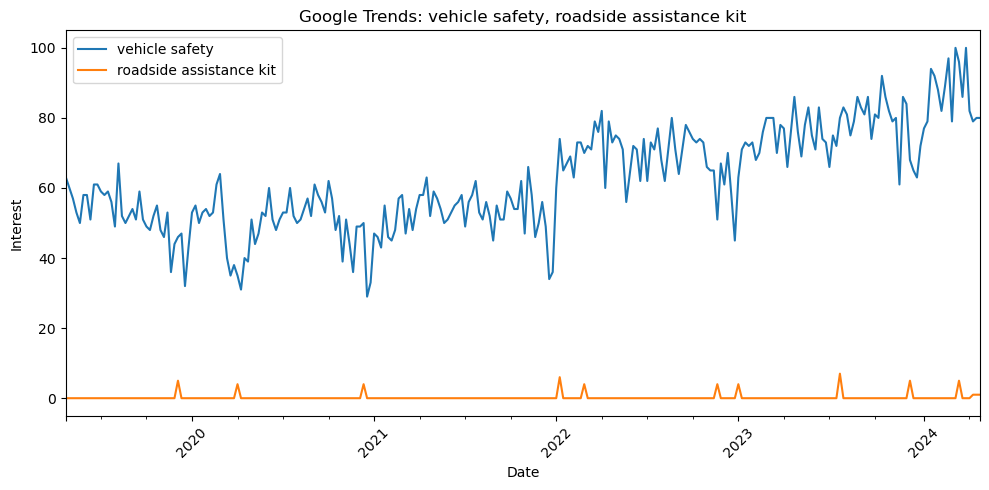

In [33]:
from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt

def analyze_google_trends(keywords):
    """Fetches and visualizes Google Trends data for specified keywords."""
    # Initialize pytrends
    pytrends = TrendReq(hl='en-US', tz=360)
    
    # Build the payload
    pytrends.build_payload(keywords, cat=0, timeframe='today 5-y', geo='US', gprop='')

    # Fetch interest over time
    trends_data = pytrends.interest_over_time()
    
    if not trends_data.empty:
        # Remove the isPartial column if present
        if 'isPartial' in trends_data.columns:
            trends_data = trends_data.drop(columns=['isPartial'])

        # Visualize trends data
        trends_data.plot(figsize=(10, 5))
        plt.title(f"Google Trends: {', '.join(keywords)}")
        plt.xlabel('Date')
        plt.ylabel('Interest')
        plt.legend(keywords)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print("No trends data found.")

# Example usage
keywords = ['vehicle safety', 'roadside assistance kit']
analyze_google_trends(keywords)
